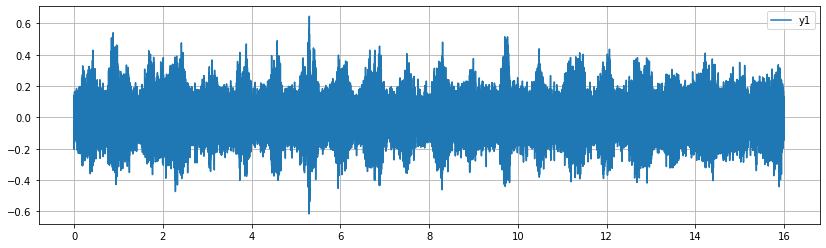

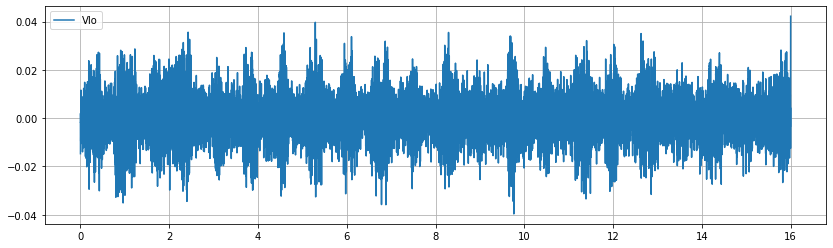

<Figure size 432x288 with 0 Axes>

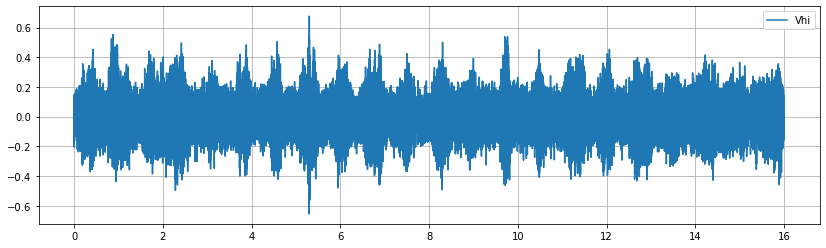

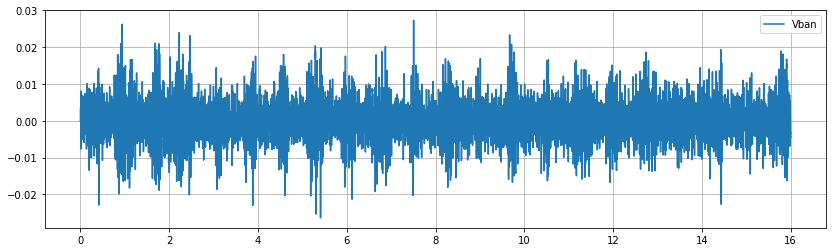

In [2]:
from scipy import signal
import scipy.signal
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.signal import butter, lfilter, freqz
from numpy.fft import fft, fftfreq
from scipy.fft import rfft, rfftfreq
from matplotlib import *

# read csv file and stored it in vibration_data

vibration_data = pd.read_csv("C:/Users/Angeleco/Desktop/Projet Prisca et Masa'il/BROYEUR VERTICAL [553]/P. PV  SUP  RED [561]/ACTM X [72021]/ACTMX.csv", sep = ";" , skiprows = 1)



# create  waveform data

x1=vibration_data["time[ms]"]/1000
y1=vibration_data[" amplitude[g]"]

# apply a 3-pole lowpass filter at 0.125x Nyquist frequency
b, a = scipy.signal.butter(3, 0.125,'lowpass')
Vlo = scipy.signal.filtfilt(b, a, y1) 
 
# apply a 3-pole Highpass filter at 0.125x Nyquist frequency
b, a = scipy.signal.butter(3, 0.125,'highpass')
Vhi = scipy.signal.filtfilt(b, a, y1)  

# apply a 3-pole Bandpass filter at 0.01x Nyquist frequency
b, a = scipy.signal.butter(3, [0.01, 0.05], 'band')
Vban = scipy.signal.lfilter(b, a, y1)

# resample the ban pass result
#f = scipy.signal.resample(Vban, 8192)
#xnew = np.linspace(0, 0.5, len(f), endpoint=False)

plt.figure(figsize=(14, 4)); 
plt.plot(x1, y1);                    # Plot the original data vs time.           
plt.legend(['y1']);
plt.grid();
plt.figure(1) 


plt.figure(figsize=(14, 4))
plt.plot(x1, Vlo);  # Plot the low-frequency filtered data vs time.  
plt.grid();
plt.legend(['Vlo']);
plt.figure(0)

plt.figure(figsize=(14, 4))
plt.plot(x1, Vhi) ;                   # Plot the high-frequency filtered data vs time.
plt.legend(['Vhi']);                 # Add a legend
plt.grid();


plt.figure(figsize=(14, 4))
plt.plot(x1, Vban) ;                   # Plot the band pass-frequency filtered data vs time.
plt.legend(['Vban']);                 # Add a legend
plt.grid()

#plt.figure(figsize=(14, 4))
#plt.plot( xnew, f, 'g-', Vban[0],'ro')
#plt.legend(['resampled'], loc='best')
#plt.grid()

plt.show()
